# Higgs Boson Event Detection ⚛🎇


<span style="font-size:25px;color:orange">Based on reviewing the dataset details and documentation provided, here are some key insights into the Higgs boson dataset:</span>

- The dataset has 250,000 events, with 30 feature columns, a weight column and a label column.
    Features can be categorized into:
    - PRI features: "Raw" measurements from the detector (e.g. tau/lepton momentum, jet properties)
    - DER features: Derived/engineered features calculated from PRI features (e.g. mass, angular differences)
- The label indicates if the event is a signal (Higgs boson decay) or background.
- Weights represent the simulated luminosity and are used to calculate expected event counts.
- Some features may be undefined (-999) if they cannot be computed or are meaningless for an event.
- Features are physics quantities like momentum, mass, energy measured in specific units (GeV, radian).
- The features were selected by physicists to optimize separation between signal and background.
- The data has been simplified from the full real-world data for the purposes of the challenge.

In summary, this is a simulated dataset representing detector measurements and derived features used by physicists to detect the Higgs boson signal from background processes. The features and data are simplified but capture the core challenge. Thorough EDA and understanding of the physics will be key to maximizing classification precision.

Here is a more thorough overview of the key features in the Higgs boson dataset:

- PRI features:
  - PRI_tau_pt: Transverse momentum of the hadronic tau 
  - PRI_tau_eta: Pseudorapidity of the hadronic tau
  - PRI_tau_phi: Azimuthal angle of the hadronic tau
  - PRI_lep_pt: Transverse momentum of the lepton
  - PRI_lep_eta: Pseudorapidity of the lepton
  - PRI_lep_phi: Azimuthal angle of the lepton
  - PRI_met: Missing transverse energy
  - PRI_met_phi: Azimuthal angle of missing transverse energy
  - PRI_jet_num: Number of jets 
  - PRI_jet_leading_pt: Transverse momentum of leading jet
  - PRI_jet_leading_eta: Pseudorapidity of leading jet
  - PRI_jet_leading_phi: Azimuthal angle of leading jet

- DER features:
  - DER_mass_MMC: Estimated Higgs boson candidate mass
  - DER_mass_transverse_met_lep: Transverse mass between missing transverse energy and lepton
  - DER_mass_vis: Invariant mass of hadronic tau and lepton
  - DER_deltar_tau_lep: Angular separation between hadronic tau and lepton
  - DER_pt_tot: Total transverse momentum magnitude
  - DER_pt_ratio_lep_tau: Transverse momentum ratio between lepton and hadronic tau
  - DER_met_phi_centrality: Centrality of missing transverse energy vector
  - DER_lep_eta_centrality: Centrality of lepton pseudorapidity between two jets

- Weight: Simulated event weight proportional to luminosity  

- Label: 's' for signal event, 'b' for background event

The PRI features represent the raw detector measurements, while DER features are engineered by physicists to improve discrimination. Meticulous examination of these features is key for maximizing precision.

Based on the documentation provided, there are a few insights about potentially useful vs redundant features:

- The PRI features represent the raw measurements from the detector and form the basic input. These should not be discarded.

- The DER features have been specifically engineered by physicists to improve separation between signal and background. So most of them are likely to be useful.

- However, some DER features like DER_mass_MMC may be undefined for some events. This could make them less useful.

- Features like azimuthal and pseudorapidity angles (phi, eta) for the tau, lepton and jets may be somewhat redundant with the transverse momentum features. 

- Features related to additional jets beyond the leading two may not add much signal vs background discrimination.

So in summary:

Useful features:
- The PRI features 
- DER features like DER_mass_transverse_met_lep, DER_mass_vis, DER_deltar_tau_lep

Potentially redundant:
- DER_mass_MMC 
- Azimuthal and pseudorapidity angles
- Features related to additional jets

But a thorough exploratory analysis should be done to truly identify useful vs redundant features. The engineered DER features should not be arbitrarily discarded without analysis. Feature selection should be guided by correlational analysis, mutual information, model-based selection like RFE or univariate feature importance.

[What is mass? by Harsh](https://jumpy-fluorine-f6d.notion.site/What-is-mass-4b0455eff0de4509b30809fe11a5dc11)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
higgs = pd.read_csv('../Dataset/training.csv')

In [13]:
higgs.shape

(250000, 33)

In [3]:
higgs.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [7]:
higgs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [8]:
null_val = higgs.isnull().sum(axis=0) * 100 / higgs.shape[0]
null_val.sort_values(ascending=False)   

EventId                        0.0
PRI_lep_pt                     0.0
Weight                         0.0
PRI_jet_all_pt                 0.0
PRI_jet_subleading_phi         0.0
PRI_jet_subleading_eta         0.0
PRI_jet_subleading_pt          0.0
PRI_jet_leading_phi            0.0
PRI_jet_leading_eta            0.0
PRI_jet_leading_pt             0.0
PRI_jet_num                    0.0
PRI_met_sumet                  0.0
PRI_met_phi                    0.0
PRI_met                        0.0
PRI_lep_phi                    0.0
PRI_lep_eta                    0.0
PRI_tau_phi                    0.0
DER_mass_MMC                   0.0
PRI_tau_eta                    0.0
PRI_tau_pt                     0.0
DER_lep_eta_centrality         0.0
DER_met_phi_centrality         0.0
DER_pt_ratio_lep_tau           0.0
DER_sum_pt                     0.0
DER_pt_tot                     0.0
DER_deltar_tau_lep             0.0
DER_prodeta_jet_jet            0.0
DER_mass_jet_jet               0.0
DER_deltaeta_jet_jet

In [9]:
higgs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EventId,250000.0,NaN,NaN,NaN,224999.5,72168.927986,100000.0,162499.75,224999.5,287499.25,349999.0
DER_mass_MMC,250000.0,NaN,NaN,NaN,-49.023079,406.345647,-999.0,78.10075,105.012,130.60625,1192.026
DER_mass_transverse_met_lep,250000.0,NaN,NaN,NaN,49.239819,35.344886,0.0,19.241,46.524,73.598,690.075
DER_mass_vis,250000.0,NaN,NaN,NaN,81.181982,40.828691,6.329,59.38875,73.752,92.259,1349.351
DER_pt_h,250000.0,NaN,NaN,NaN,57.895962,63.655682,0.0,14.06875,38.4675,79.169,2834.999
DER_deltaeta_jet_jet,250000.0,NaN,NaN,NaN,-708.420675,454.480565,-999.0,-999.0,-999.0,0.49,8.503
DER_mass_jet_jet,250000.0,NaN,NaN,NaN,-601.237051,657.972302,-999.0,-999.0,-999.0,83.446,4974.979
DER_prodeta_jet_jet,250000.0,NaN,NaN,NaN,-709.356603,453.019877,-999.0,-999.0,-999.0,-4.593,16.69
DER_deltar_tau_lep,250000.0,NaN,NaN,NaN,2.3731,0.782911,0.208,1.81,2.4915,2.961,5.684
DER_pt_tot,250000.0,NaN,NaN,NaN,18.917332,22.273494,0.0,2.841,12.3155,27.591,2834.999


In [10]:
numerical_feature = [feature for feature in higgs.columns if higgs[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(higgs[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in higgs.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Numerical Features Count 32
Categorical feature Count 1
Discrete feature Count 1
Continuous feature Count 31


In [11]:
higgs.duplicated().sum()

0

In [12]:
[col for col in higgs if higgs[col].nunique()==1]

[]

In [14]:
higgs.nunique()

EventId                        250000
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7087
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_lead

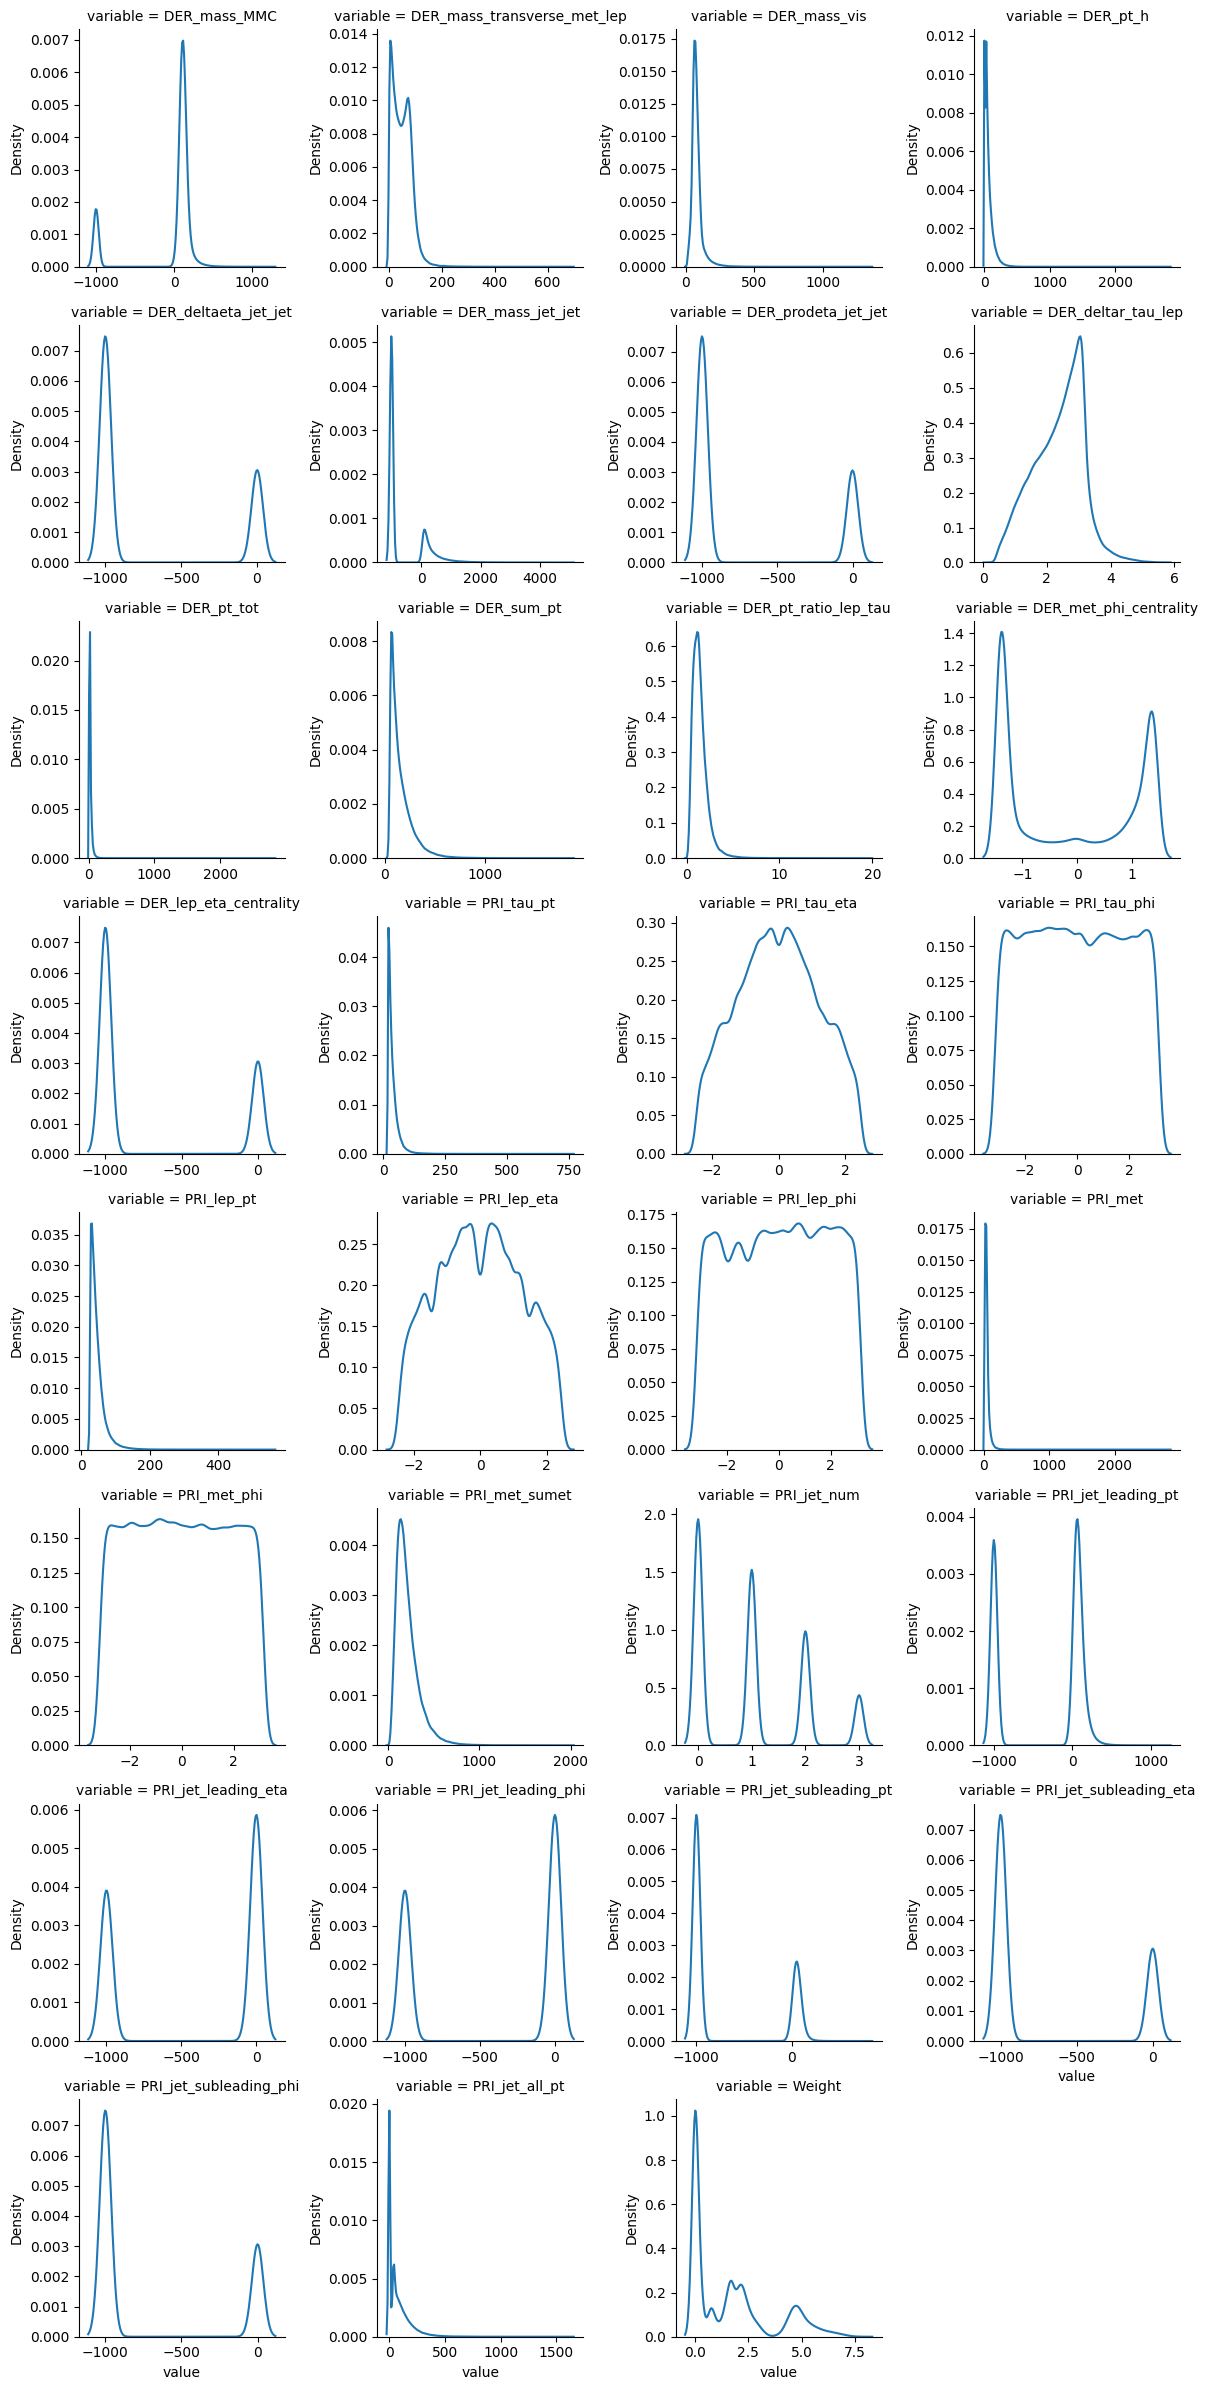

In [21]:
unpivot = pd.melt(higgs, higgs.describe().columns[0], higgs.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

In [24]:
higgs = higgs[[
    # 'EventId', 
    'DER_mass_MMC', 
    'DER_mass_transverse_met_lep',
    'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
    'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
    'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
    'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
    'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
    'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
    'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
    'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
    # 'Weight', 
    'Label']].copy()

- `EventID` is not a feature, it is just an index (dropping it)


* The `PRI_jet_num` feature is a categorical feature with 4 levels. The number of jets is a key feature for discriminating signal vs background. So it should be treated as a categorical feature.

In [27]:
higgs['PRI_jet_num'].value_counts() # This feature is ordinal that shows the number of jets in the event

PRI_jet_num
0    99913
1    77544
2    50379
3    22164
Name: count, dtype: int64

To Treate the `undefined` values like `-999`, first we'll convert it to nan...

In [38]:
columns_with_minus_999 = higgs.columns[higgs.eq(-999).any()]

In [39]:
columns_with_minus_999

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'],
      dtype='object')

In [43]:
# replace -999.0 with NaN
higgs[columns_with_minus_999] = higgs[columns_with_minus_999].replace(-999.0, np.nan)

In [48]:
null_val = higgs.isnull().sum(axis=0) * 100 / higgs.shape[0]
null_val.sort_values(ascending=False)   

PRI_jet_subleading_pt          70.9828
DER_lep_eta_centrality         70.9828
PRI_jet_subleading_phi         70.9828
DER_deltaeta_jet_jet           70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
PRI_jet_subleading_eta         70.9828
PRI_jet_leading_eta            39.9652
PRI_jet_leading_pt             39.9652
PRI_jet_leading_phi            39.9652
DER_mass_MMC                   15.2456
PRI_lep_phi                     0.0000
PRI_jet_all_pt                  0.0000
PRI_jet_num                     0.0000
PRI_met_sumet                   0.0000
PRI_met_phi                     0.0000
PRI_met                         0.0000
PRI_tau_phi                     0.0000
PRI_lep_eta                     0.0000
PRI_lep_pt                      0.0000
DER_mass_transverse_met_lep     0.0000
PRI_tau_eta                     0.0000
PRI_tau_pt                      0.0000
DER_met_phi_centrality          0.0000
DER_pt_ratio_lep_tau            0.0000
DER_sum_pt               

In [49]:
null_val[null_val > 50].index.values

array(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'], dtype=object)

Will drop columns with more than 50% nan values...

In [51]:
columns_above_50_percent_null = null_val[null_val > 50].index.tolist()
higgs.drop(columns_above_50_percent_null, axis=1, inplace=True)

In [52]:
higgs.shape

(250000, 24)

In [61]:
null_val = null_val[null_val > 0]
null_val

DER_mass_MMC           15.2456
PRI_jet_leading_pt     39.9652
PRI_jet_leading_eta    39.9652
PRI_jet_leading_phi    39.9652
dtype: float64

In [63]:
higgs.shape

(250000, 24)

In [64]:
# We will remove the rows with NAN values present in all undef value columns 
higgs_copy = higgs.copy()
higgs_copy = higgs_copy[higgs_copy[null_val.index.tolist()].isna().sum(axis=1) == 0] 

In [65]:
higgs_copy.shape 

(138096, 24)

+ IF we use this technique we loose 55% of the data... `we can't afford that`...

In [66]:
higgs.shape

(250000, 24)

* For remaining columns with null values ... we will use knn imputer to fill the null values...

In [67]:
# we will use knn imputer to impute the missing values for numerical columns
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [68]:
higgs[null_val.index.tolist()] = imputer.fit_transform(higgs[null_val.index.tolist()])

In [69]:
null_val = higgs.isnull().sum(axis=0) * 100 / higgs.shape[0]
null_val.sort_values(ascending=False)   

DER_mass_MMC                   0.0
DER_mass_transverse_met_lep    0.0
PRI_jet_all_pt                 0.0
PRI_jet_leading_phi            0.0
PRI_jet_leading_eta            0.0
PRI_jet_leading_pt             0.0
PRI_jet_num                    0.0
PRI_met_sumet                  0.0
PRI_met_phi                    0.0
PRI_met                        0.0
PRI_lep_phi                    0.0
PRI_lep_eta                    0.0
PRI_lep_pt                     0.0
PRI_tau_phi                    0.0
PRI_tau_eta                    0.0
PRI_tau_pt                     0.0
DER_met_phi_centrality         0.0
DER_pt_ratio_lep_tau           0.0
DER_sum_pt                     0.0
DER_pt_tot                     0.0
DER_deltar_tau_lep             0.0
DER_pt_h                       0.0
DER_mass_vis                   0.0
Label                          0.0
dtype: float64

In [71]:
higgs.shape

(250000, 24)

In [70]:
higgs.to_csv('../Dataset/higgs_imputed.csv', index=False)

### Checkpoint 1 ... 

In [2]:
higgs = pd.read_csv('../Dataset/higgs_imputed.csv')
higgs.shape

(250000, 24)

## EDA

* The goal is to generate plots that provide insight into:

    - Separation between signal and background
    - Relationship between PRI and DER features
    - Physics behind signal vs. background characteristics

Text(0, 0.5, 'Frequency')

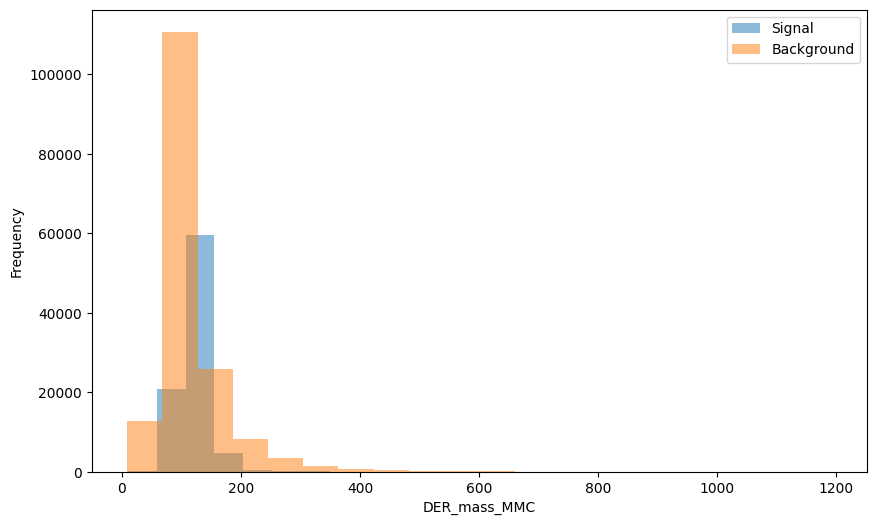

In [7]:
# 1. Histogram of DER_mass_MMC by Label
plt.figure(figsize=(10, 6))
plt.hist(higgs[higgs['Label']=='s']['DER_mass_MMC'].clip(lower=0, upper=200), bins=20, alpha=0.5, label='Signal')
plt.hist(higgs[higgs['Label']=='b']['DER_mass_MMC'].clip(lower=0, upper=200), bins=20, alpha=0.5, label='Background')
plt.legend()
plt.xlabel('DER_mass_MMC'); plt.ylabel('Frequency')

This shows the distribution of the reconstructed Higgs mass for signal vs background. Potentially useful to see separation.

<Axes: xlabel='PRI_tau_pt', ylabel='DER_pt_tot'>

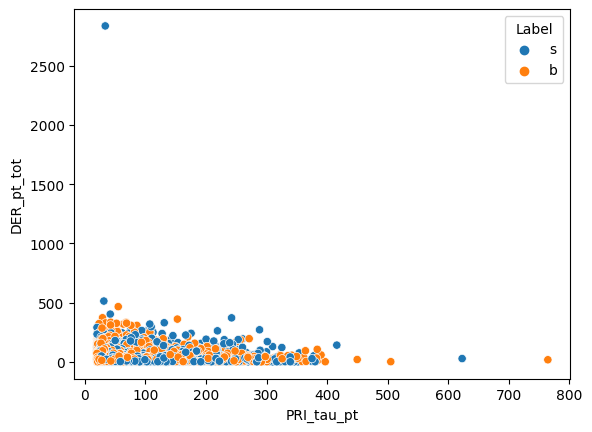

In [8]:
# 2. Scatter plot of DER_pt_tot vs PRI_tau_pt by Label 
ax = sns.scatterplot(data=higgs, x='PRI_tau_pt', y='DER_pt_tot', hue='Label')
ax.set(xlim=(0, 200), ylim=(0, 500))

Shows if total transverse momentum separates signal from background when compared to tau pt.

<Axes: xlabel='PRI_jet_num', ylabel='count'>

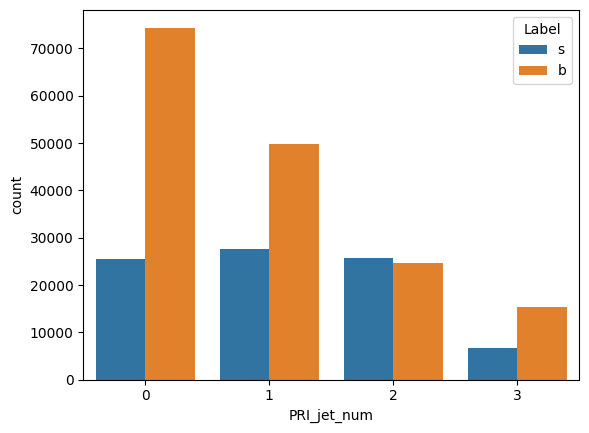

In [10]:
# 3. Bar plot of PRI_jet_num by Label
sns.countplot(data=higgs, x='PRI_jet_num', hue='Label')

Shows whether jet multiplicity differs between signal and background.

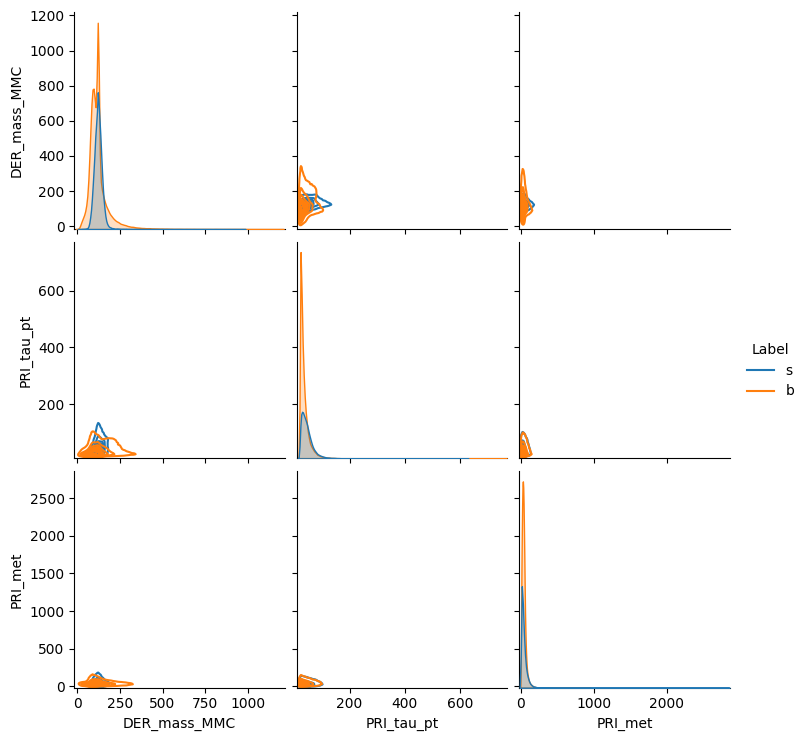

In [14]:
# 4. Grid of density plots
features = ['DER_mass_MMC', 'PRI_tau_pt', 'PRI_met',"Label"] 
sns.pairplot(higgs[features], kind='kde', hue='Label')

Grid of plots showing the pairwise relationships between PRI and DER features, conditioned on Label.

* Clearly there are some outliers in the dataset ... 

In [5]:
higgs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DER_mass_MMC,250000.0,NaN,NaN,NaN,121.869125,53.06764,9.044,95.21375,117.5195,132.08125,1192.026
DER_mass_transverse_met_lep,250000.0,NaN,NaN,NaN,49.239819,35.344886,0.0,19.241,46.524,73.598,690.075
DER_mass_vis,250000.0,NaN,NaN,NaN,81.181982,40.828691,6.329,59.38875,73.752,92.259,1349.351
DER_pt_h,250000.0,NaN,NaN,NaN,57.895962,63.655682,0.0,14.06875,38.4675,79.169,2834.999
DER_deltar_tau_lep,250000.0,NaN,NaN,NaN,2.3731,0.782911,0.208,1.81,2.4915,2.961,5.684
DER_pt_tot,250000.0,NaN,NaN,NaN,18.917332,22.273494,0.0,2.841,12.3155,27.591,2834.999
DER_sum_pt,250000.0,NaN,NaN,NaN,158.432217,115.706115,46.104,77.55,120.6645,200.47825,1852.462
DER_pt_ratio_lep_tau,250000.0,NaN,NaN,NaN,1.437609,0.844743,0.047,0.883,1.28,1.777,19.773
DER_met_phi_centrality,250000.0,NaN,NaN,NaN,-0.128305,1.193585,-1.414,-1.371,-0.356,1.225,1.414
PRI_tau_pt,250000.0,NaN,NaN,NaN,38.707419,22.412081,20.0,24.59175,31.804,45.017,764.408


### Splitting the data:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(higgs.drop('Label', axis=1), higgs['Label'], test_size=0.2, shuffle=True,stratify=higgs["Label"], random_state=42)

In [4]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
data_test.shape, data_train.shape

((50000, 24), (200000, 24))

In [5]:
#separating numerical and categorical features
num_features = data_train.select_dtypes(include = ['float64', 'int64']).columns
cat_features = data_train.select_dtypes(include = ['object']).columns

In [6]:
num_features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt'],
      dtype='object')

In [7]:
cat_features

Index(['Label'], dtype='object')

#### IQR technique

In [9]:
#outlier removal using IQR on train data ...
for i in num_features:
    q1 = data_train[i].quantile(0.25)
    q3 = data_train[i].quantile(0.75)
    iqr = q3 - q1
    data_train = data_train[(data_train[i] >= q1 - 1.5*iqr) & (data_train[i] <= q3 + 1.5*iqr)]

In [10]:
X = data_train.drop('Label', axis=1)
y = data_train['Label']

#### Scaling Features

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
y.replace({'s':1, 'b':0}, inplace=True)

### Modelling 

In [26]:
X.shape

(101528, 23)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the hidden layers
classifier.add(Dense(23, activation = 'relu', input_dim = 23))
classifier.add(Dense(100, activation = 'tanh' ))
classifier.add(Dense(200, activation = 'relu', kernel_regularizer='l2'))
classifier.add(Dense(50, activation = 'tanh', kernel_regularizer='l2'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [39]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 23)                552       
                                                                 
 dense_8 (Dense)             (None, 100)               2400      
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 dense_10 (Dense)            (None, 50)                10050     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 33253 (129.89 KB)
Trainable params: 33253 (129.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
import tensorflow as tf
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [41]:
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy',"Precision","Recall","AUC"])

In [42]:
classifier.fit(X, y, epochs = 100, callbacks=[tensorboard_callback])

Epoch 1/100


3173/3173 [==============================] - 11s 3ms/step - loss: 0.4812 - accuracy: 0.8030 - precision: 0.7144 - recall: 0.6254 - auc: 0.8611
Epoch 2/100
3173/3173 [==============================] - 10s 3ms/step - loss: 0.4104 - accuracy: 0.8156 - precision: 0.7341 - recall: 0.6512 - auc: 0.8762
Epoch 3/100
3173/3173 [==============================] - 11s 4ms/step - loss: 0.4048 - accuracy: 0.8179 - precision: 0.7360 - recall: 0.6594 - auc: 0.8791
Epoch 4/100
3173/3173 [==============================] - 11s 3ms/step - loss: 0.4020 - accuracy: 0.8181 - precision: 0.7371 - recall: 0.6581 - auc: 0.8804
Epoch 5/100
3173/3173 [==============================] - 13s 4ms/step - loss: 0.4000 - accuracy: 0.8205 - precision: 0.7401 - recall: 0.6639 - auc: 0.8814
Epoch 6/100
3173/3173 [==============================] - 19s 6ms/step - loss: 0.3989 - accuracy: 0.8207 - precision: 0.7384 - recall: 0.6682 - auc: 0.8820
Epoch 7/100
3173/3173 [==============================] - 17s 5ms/step - loss: 0.39

KeyboardInterrupt: 

In [45]:
y_test.replace({'s':1, 'b':0}, inplace=True)

In [47]:
y_pred = classifier.predict(X_test)

2344/2344 [==============================] - 3s 1ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
print(classification_report(y_test, y_pred.round()))


              precision    recall  f1-score   support

           0       0.66      0.97      0.79     49555
           1       0.37      0.03      0.06     25445

    accuracy                           0.65     75000
   macro avg       0.52      0.50      0.42     75000
weighted avg       0.56      0.65      0.54     75000



<Axes: >

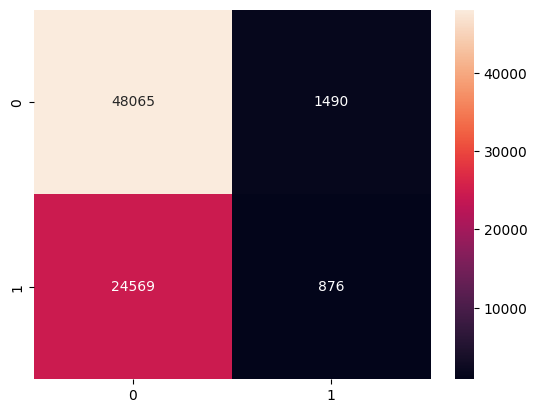

In [50]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d')


In [52]:
# precision score
precision_score(y_test, y_pred.round())

0.3702451394759087

* Above basic model got 74 presicion on train and 0.37 prescision on test data...

Lets see if we can imporve that ... with kfold cross validation 

In [36]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import optuna
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.metrics import Precision
from sklearn.metrics import precision_score

In [31]:
# Define model builder
def create_model(learning_rate, num_layers, num_units):
    model = Sequential()
    for i in range(num_layers):
        model.add(Dense(num_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=[Precision()]) 
    return model

In [28]:
X.shape, y.shape

((86744, 23), (86744,))

In [38]:
# Define objective 
def objective(trial):

    # Hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_units = trial.suggest_int('num_units', 8, 128)
    
    # Cross validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = KerasClassifier(build_fn=create_model, 
                                learning_rate=learning_rate,
                                num_layers=num_layers, 
                                num_units=num_units,
                                verbose=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        scores.append(precision)
    
    return np.mean(scores)

In [39]:
# Optimize    
study = optuna.create_study()
study.optimize(objective, n_trials=40)

print('Best trial:')
trial = study.best_trial
print(trial.values)
print('Precision score: {}'.format(trial.value))


[I 2023-11-04 14:59:21,108] A new study created in memory with name: no-name-64a09ff1-acfd-4aec-a744-f7902e565469


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:03:06,850] Trial 0 finished with value: 0.7162142044683543 and parameters: {'learning_rate': 0.0002316208682114443, 'num_layers': 1, 'num_units': 84}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:04:59,766] Trial 1 finished with value: 0.7285987984036522 and parameters: {'learning_rate': 0.00479270078704621, 'num_layers': 2, 'num_units': 103}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:06:12,707] Trial 2 finished with value: 0.7271619480877323 and parameters: {'learning_rate': 0.0035980336566582083, 'num_layers': 3, 'num_units': 43}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:07:19,763] Trial 3 finished with value: 0.7245631808503957 and parameters: {'learning_rate': 0.006519894068085366, 'num_layers': 3, 'num_units': 65}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:08:57,470] Trial 4 finished with value: 0.7216789582388681 and parameters: {'learning_rate': 0.0003445012380342136, 'num_layers': 1, 'num_units': 92}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:10:10,098] Trial 5 finished with value: 0.7213639518240472 and parameters: {'learning_rate': 0.0001496062895211928, 'num_layers': 2, 'num_units': 117}. Best is trial 0 with value: 0.7162142044683543.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:11:11,072] Trial 6 finished with value: 0.7123298087291566 and parameters: {'learning_rate': 0.002361008258755826, 'num_layers': 1, 'num_units': 71}. Best is trial 6 with value: 0.7123298087291566.


272/272 [==============================] - 0s 1ms/step


[I 2023-11-04 15:12:36,692] Trial 7 finished with value: 0.7042558476631262 and parameters: {'learning_rate': 0.0007105115032132633, 'num_layers': 2, 'num_units': 8}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:14:07,492] Trial 8 finished with value: 0.7379262007487607 and parameters: {'learning_rate': 0.009104411016477264, 'num_layers': 2, 'num_units': 85}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:15:26,381] Trial 9 finished with value: 0.7163267412030266 and parameters: {'learning_rate': 0.007559425828898494, 'num_layers': 1, 'num_units': 54}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:17:17,727] Trial 10 finished with value: 0.7079030267325207 and parameters: {'learning_rate': 0.0007933940981352638, 'num_layers': 3, 'num_units': 8}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:19:03,894] Trial 11 finished with value: 0.715429857911581 and parameters: {'learning_rate': 0.0007755598493319336, 'num_layers': 3, 'num_units': 11}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:20:48,707] Trial 12 finished with value: 0.7098982558995868 and parameters: {'learning_rate': 0.0009123760881150437, 'num_layers': 3, 'num_units': 8}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:22:30,727] Trial 13 finished with value: 0.729850831488244 and parameters: {'learning_rate': 0.0016428645300409948, 'num_layers': 2, 'num_units': 29}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:24:13,383] Trial 14 finished with value: 0.7091298064495414 and parameters: {'learning_rate': 0.00046864447307780365, 'num_layers': 2, 'num_units': 26}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:25:59,721] Trial 15 finished with value: 0.7157525857551668 and parameters: {'learning_rate': 0.0013516828350816214, 'num_layers': 3, 'num_units': 26}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:27:40,967] Trial 16 finished with value: 0.7257969702225854 and parameters: {'learning_rate': 0.0006205907169563305, 'num_layers': 2, 'num_units': 44}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:29:29,786] Trial 17 finished with value: 0.7134244465762488 and parameters: {'learning_rate': 0.0011405795203610711, 'num_layers': 3, 'num_units': 18}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:31:11,747] Trial 18 finished with value: 0.7139834676147284 and parameters: {'learning_rate': 0.0004090636710215892, 'num_layers': 2, 'num_units': 39}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:32:58,691] Trial 19 finished with value: 0.7253202879727739 and parameters: {'learning_rate': 0.0006590633858673898, 'num_layers': 3, 'num_units': 58}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:34:46,208] Trial 20 finished with value: 0.7375348557788178 and parameters: {'learning_rate': 0.0020470472440623447, 'num_layers': 2, 'num_units': 128}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:36:29,451] Trial 21 finished with value: 0.7148044063216623 and parameters: {'learning_rate': 0.000440319188355048, 'num_layers': 2, 'num_units': 24}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:38:12,798] Trial 22 finished with value: 0.717276654617254 and parameters: {'learning_rate': 0.0010453286642899643, 'num_layers': 2, 'num_units': 15}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:39:55,083] Trial 23 finished with value: 0.7224198852645844 and parameters: {'learning_rate': 0.000552455355877629, 'num_layers': 2, 'num_units': 33}. Best is trial 7 with value: 0.7042558476631262.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:41:32,969] Trial 24 finished with value: 0.6771655796285752 and parameters: {'learning_rate': 0.0002824834898316976, 'num_layers': 2, 'num_units': 8}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:43:06,241] Trial 25 finished with value: 0.6819891927899311 and parameters: {'learning_rate': 0.0002815997904721564, 'num_layers': 1, 'num_units': 8}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:44:41,622] Trial 26 finished with value: 0.7020177158642615 and parameters: {'learning_rate': 0.0002934664194834027, 'num_layers': 1, 'num_units': 19}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:46:20,625] Trial 27 finished with value: 0.6804676022099658 and parameters: {'learning_rate': 0.00010723643261022405, 'num_layers': 1, 'num_units': 19}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:47:59,327] Trial 28 finished with value: 0.695491882129612 and parameters: {'learning_rate': 0.00010008701715834895, 'num_layers': 1, 'num_units': 35}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:49:36,479] Trial 29 finished with value: 0.7145774644571947 and parameters: {'learning_rate': 0.00021817223895562892, 'num_layers': 1, 'num_units': 47}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:51:11,649] Trial 30 finished with value: 0.6980150574572012 and parameters: {'learning_rate': 0.00021525240828729552, 'num_layers': 1, 'num_units': 20}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 1s 3ms/step


[I 2023-11-04 15:52:47,038] Trial 31 finished with value: 0.6915525700154277 and parameters: {'learning_rate': 0.00010590719359235717, 'num_layers': 1, 'num_units': 32}. Best is trial 24 with value: 0.6771655796285752.


272/272 [==============================] - 0s 2ms/step


[I 2023-11-04 15:53:58,871] Trial 32 finished with value: 0.6733543830991086 and parameters: {'learning_rate': 0.00011137993409774285, 'num_layers': 1, 'num_units': 16}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 0s 2ms/step


[I 2023-11-04 15:54:52,438] Trial 33 finished with value: 0.6835910335195322 and parameters: {'learning_rate': 0.0001496726937449985, 'num_layers': 1, 'num_units': 16}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 0s 2ms/step


[I 2023-11-04 15:55:48,508] Trial 34 finished with value: 0.7017038543129508 and parameters: {'learning_rate': 0.0002756172274652847, 'num_layers': 1, 'num_units': 22}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 0s 2ms/step


[I 2023-11-04 15:56:42,963] Trial 35 finished with value: 0.6759602506355792 and parameters: {'learning_rate': 0.00016240366158948598, 'num_layers': 1, 'num_units': 14}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:57:37,740] Trial 36 finished with value: 0.7121577788341918 and parameters: {'learning_rate': 0.00015045028235384936, 'num_layers': 1, 'num_units': 74}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 0s 1ms/step


[I 2023-11-04 15:58:34,222] Trial 37 finished with value: 0.7112541067975626 and parameters: {'learning_rate': 0.0001900778473802868, 'num_layers': 1, 'num_units': 52}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 1s 2ms/step


[I 2023-11-04 15:59:29,840] Trial 38 finished with value: 0.7128923243175307 and parameters: {'learning_rate': 0.00012805145819527036, 'num_layers': 1, 'num_units': 102}. Best is trial 32 with value: 0.6733543830991086.


272/272 [==============================] - 0s 1ms/step


[I 2023-11-04 16:00:25,979] Trial 39 finished with value: 0.7054605070562198 and parameters: {'learning_rate': 0.00018871847278391214, 'num_layers': 1, 'num_units': 38}. Best is trial 32 with value: 0.6733543830991086.


Best trial:
[0.6733543830991086]
Precision score: 0.6733543830991086


* opt_param = {'learning_rate': 0.00018871847278391214, 'num_layers': 1, 'num_units': 38} took 1 hr to train | Precision score on val : 0.6733543830991086 


In [45]:
# Building the model with best parameters
opt_model = Sequential()

opt_model.add(Dense(38, activation = 'relu', input_dim = 23))
opt_model.add(Dense(1, activation = 'sigmoid'))

optimizer = Adam(learning_rate=0.000189)

opt_model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=[Precision(), "accuracy", "Recall", "AUC"])

# Print model summary
opt_model.summary()

Model: "sequential_419"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1156 (Dense)          (None, 38)                912       
                                                                 
 dense_1157 (Dense)          (None, 1)                 39        
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Train model 
opt_model.fit(X,y, epochs=20)

Epoch 1/20
2711/2711 [==============================] - 7s 2ms/step - loss: 0.4638 - precision_414: 0.6403 - accuracy: 0.7736 - recall: 0.5077 - auc: 0.8160
Epoch 2/20
2711/2711 [==============================] - 7s 2ms/step - loss: 0.4101 - precision_414: 0.7164 - accuracy: 0.8114 - recall: 0.5833 - auc: 0.8626
Epoch 3/20
2711/2711 [==============================] - 6s 2ms/step - loss: 0.4026 - precision_414: 0.7212 - accuracy: 0.8150 - recall: 0.5945 - auc: 0.8682
Epoch 4/20
2711/2711 [==============================] - 7s 2ms/step - loss: 0.3992 - precision_414: 0.7241 - accuracy: 0.8168 - recall: 0.5996 - auc: 0.8707
Epoch 5/20
2711/2711 [==============================] - 7s 2ms/step - loss: 0.3973 - precision_414: 0.7224 - accuracy: 0.8170 - recall: 0.6036 - auc: 0.8721
Epoch 6/20
2711/2711 [==============================] - 7s 2ms/step - loss: 0.3960 - precision_414: 0.7234 - accuracy: 0.8178 - recall: 0.6061 - auc: 0.8730
Epoch 7/20
2711/2711 [==============================] - 7s

In [48]:
opt_model.evaluate(data_test.drop('Label', axis=1), data_test['Label'].replace({'s':1, 'b':0}))

1563/1563 [==============================] - 3s 2ms/step - loss: 9.8564 - precision_414: 0.5419 - accuracy: 0.6833 - recall: 0.4904 - auc: 0.6528


[9.85641098022461,
 0.5418897271156311,
 0.6833199858665466,
 0.490398645401001,
 0.6527560353279114]

In [60]:
loss, precision, accuracy, recall, auc = opt_model.evaluate(data_test.drop('Label', axis=1), data_test['Label'].replace({'s':1, 'b':0}))

1563/1563 [==============================] - 4s 3ms/step - loss: 9.8564 - precision_414: 0.5419 - accuracy: 0.6833 - recall: 0.4904 - auc: 0.6528


In [67]:
from sklearn.metrics import classification_report
classification_report = classification_report(data_test['Label'].replace({'s':1, 'b':0}), opt_model.predict(data_test.drop('Label', axis=1)).round())

1563/1563 [==============================] - 2s 1ms/step


In [69]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     32867
           1       0.54      0.49      0.51     17133

    accuracy                           0.68     50000
   macro avg       0.64      0.64      0.64     50000
weighted avg       0.68      0.68      0.68     50000



---

In [50]:
import joblib
import pickle

In [52]:
# joblib.dump(opt_model, '../model/tunned_model_joblib.joblib')
# pickle.dump(opt_model, open('../model/tunned_model_pkl.pkl', 'wb'))
# Can't save keras model with joblib or pickle 

opt_model.save('../model/tunned_model_h5.h5')

In [59]:
import keras
mod = keras.models.load_model('../model/tunned_model_h5.h5')
y_pred = mod.predict(data_test.drop('Label', axis=1))
precision_score(data_test['Label'].replace({'s':1, 'b':0}), y_pred.round())

1563/1563 [==============================] - 2s 1ms/step


0.5418897129958078

### This the best model we got so far...

* We can train model for more epochs to get better results...
* We can go for ML models like XGBoost, etc
* More tunning can be done using keras tunner.


---

## We'll also try pycaret AutoML for better results...

[Pycaret Docs](https://pycaret.gitbook.io/docs/get-started/functions/optimize)

In [64]:
# !pip install -Uqqq pycaret
# !pip install -U scikit-learn scipy matplotlib

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\maxxk\\AppData\\Roaming\\Python\\Python310\\site-packages\\~cipy.libs\\libopenblas-802f9ed1179cb9c9b03d67ff79f48187.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/69/8a/cf17d6443f5f537e099be81535a56ab68a473f9393fbffda38cd19899fc8/scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/96/96/117ba44070780fea0874279e5bf84816d2b62c3b151b6fcfc738022f55f4/matplotlib-3.8.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.2/9.3 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.3 MB 6.7 MB/s e

In [70]:
from pycaret.classification import * 


pycaret_automl = setup(data=data_train, target = 'Label', session_id=11, fold=12)

,Description,Value
0,Session id,11
1,Target,Label
2,Target type,Binary
3,Original data shape,"(86744, 24)"
4,Transformed data shape,"(86744, 24)"
5,Transformed train set shape,"(60720, 24)"
6,Transformed test set shape,"(26024, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [74]:
better_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8176,0.8701,0.5741,0.7415,0.6471,0.5268,0.5347,3.5367
rf,Random Forest Classifier,0.8171,0.8701,0.5826,0.7345,0.6498,0.5282,0.5347,10.9958
gbc,Gradient Boosting Classifier,0.8180,0.8729,0.6045,0.7249,0.6592,0.5364,0.5406,17.3425
lightgbm,Light Gradient Boosting Machine,0.8191,0.8768,0.6110,0.7247,0.6630,0.5406,0.5443,0.7917
xgboost,Extreme Gradient Boosting,0.8138,0.8698,0.6140,0.7081,0.6576,0.5307,0.5333,0.8442
ridge,Ridge Classifier,0.7956,0.0000,0.5176,0.7024,0.5959,0.4633,0.4731,0.0667
ada,Ada Boost Classifier,0.8053,0.8573,0.5867,0.6970,0.6370,0.5053,0.5089,3.0317
lda,Linear Discriminant Analysis,0.7950,0.8466,0.5482,0.6849,0.6089,0.4723,0.4777,0.1708
lr,Logistic Regression,0.7959,0.8486,0.5686,0.6790,0.6186,0.4809,0.4846,2.5533
knn,K Neighbors Classifier,0.7876,0.8118,0.5823,0.6516,0.6150,0.4690,0.4705,1.4483


In [83]:
# predict on new data
new_data = data_test.copy()
new_data.drop('Label', axis = 1, inplace = True)

In [88]:
predictions = predict_model(better_model, data = new_data)
precision_score(predictions["prediction_label"], data_test['Label'].replace({'s':1, 'b':0}))

0.6151286990019261

Little Better than Keras ...

In [89]:
tunned_model = tune_model(better_model, optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7818,0.8650,0.7889,0.5944,0.6779,0.5179,0.5297
1,0.7702,0.8623,0.7957,0.5762,0.6684,0.4993,0.5145
2,0.7844,0.8767,0.8086,0.5955,0.6859,0.5274,0.5417
3,0.7852,0.8689,0.8053,0.5974,0.6859,0.5281,0.5417
4,0.7769,0.8639,0.7822,0.5880,0.6713,0.5075,0.5194
5,0.7771,0.8639,0.7849,0.5879,0.6723,0.5086,0.5208
6,0.7830,0.8736,0.8189,0.5922,0.6874,0.5277,0.5439
7,0.7794,0.8664,0.8039,0.5890,0.6799,0.5177,0.5323
8,0.7836,0.8739,0.7985,0.5959,0.6825,0.5236,0.5365


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [90]:
tunned_pred = predict_model(tunned_model, data = new_data)
precision_score(tunned_pred["prediction_label"], data_test['Label'].replace({'s':1, 'b':0}))

0.6151286990019261

### This is the best model we got so far... using autoML

* We can try XGBoost (don't know why but love this name :)
* More Research can be done on this dataset to get better results...

In [92]:
final_model = finalize_model(tunned_model)
save_model(final_model, model_name='../model/pycaret_model.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['DER_mass_MMC',
                                              'DER_mass_transverse_met_lep',
                                              'DER_mass_vis', 'DER_pt_h',
                                              'DER_deltar_tau_lep', 'DER_pt_tot',
                                              'DER_sum_pt',
                                              'DER_pt_ratio_lep_tau',
                                              'DER_met_phi_centrality',
                                              'PRI_tau_pt', 'PRI_tau_eta',
                                              'PRI_tau_phi', 'PRI_lep_pt',
                                              'PRI_lep_eta', 'PRI_lep_...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
  

In [93]:
automod = pickle.load(open('../model/pycaret_model.pkl', 'rb'))

In [94]:
y_pred = automod.predict(data_test.drop('Label', axis=1))
precision_score(data_test['Label'].replace({'s':1, 'b':0}), y_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [96]:
y_pred = load_model('../model/pycaret_model')
precision_score(data_test['Label'].replace({'s':1, 'b':0}), y_pred.predict(data_test.drop('Label', axis=1)))

Transformation Pipeline and Model Successfully Loaded


0.7408161780752164

i don't know how this works : ) 

In [ ]:
%tensorboard